# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phili\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\phili\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\phili\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
df = pd.read_csv("data/20-newsgroups.csv")
# 2. Print the shape
df.shape

(11314, 4)

In [3]:
# 3. Inspect / remove nulls and duplicates
df.isnull().sum()


id                0
message           0
topic             0
topic_category    0
dtype: int64

In [4]:
# 4. Find class balances, print out how many of each topic_category there are.
print('Seems like the classes are relatively balanced.')
df['topic_category'].value_counts(normalize=True)


Seems like the classes are relatively balanced.


rec.sport.hockey            0.053032
soc.religion.christian      0.052943
rec.motorcycles             0.052855
rec.sport.baseball          0.052766
sci.crypt                   0.052590
rec.autos                   0.052501
sci.med                     0.052501
comp.windows.x              0.052413
sci.space                   0.052413
comp.os.ms-windows.misc     0.052236
sci.electronics             0.052236
comp.sys.ibm.pc.hardware    0.052148
misc.forsale                0.051706
comp.graphics               0.051617
comp.sys.mac.hardware       0.051087
talk.politics.mideast       0.049850
talk.politics.guns          0.048259
alt.atheism                 0.042425
talk.politics.misc          0.041100
talk.religion.misc          0.033322
Name: topic_category, dtype: float64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [5]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'

def lowercase(text):
    return text.lower()

lowercase(test_string)


'this is a sentence with lots of caps.'

In [6]:
# 2. Make a function that removes all punctuation. 


test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
def remove_puncs(sentence):    
    
    sentence = re.sub(r'[^\w\s]','',sentence)
    return sentence
remove_puncs(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [7]:
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'
def remove_stopwords(text):
    words = word_tokenize(text)
    vaild_words = []
    
    for word in words:
        if word not in stopwords:
            vaild_words.append(word)
    text = ' '.join(vaild_words)
    return text

remove_stopwords(test_string)

'This sentence ! With different stopwords added .'

In [8]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'



In [9]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.


test_string = 'I played and started playing with players and we all love to play with plays'
def pipeline(pipelined_str):
    pipelined_str = lowercase(pipelined_str)
    pipelined_str = remove_puncs(pipelined_str)
    pipelined_str = remove_stopwords(pipelined_str)    
    return pipelined_str
pipeline(test_string)

'played started playing players love play plays'

In [10]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['pipeline_message'] = df['message'].apply(pipeline)
df.head()

,id,message,topic,topic_category,pipeline_message
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu wheres thing subject car nntpp...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thomas e willis subject ...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamber joe green subject weitek p9000 org...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowell subject...


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [11]:
# 1. Define your `X` and `y` data. 
X = df['pipeline_message'].values
y = df['topic_category'].values


In [12]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

vectorizer = TfidfVectorizer()

In [13]:
# 3. Fit your vectorizer using your X data

vectorizer.fit(X)

TfidfVectorizer()

In [14]:
# 4. Transform your X data using your fitted vectorizer. 
X = vectorizer.transform(X)


In [15]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X.shape)


(11314, 139767)


# Split your data into Training and Testing data. 

In [16]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [17]:
# 1. Initalize an empty model. 
model = MultinomialNB(alpha=.05) 
#Not sure what alpha=0.5 is. Refer: https://en.wikipedia.org/wiki/Hyperparameter_optimization 


In [18]:
# Fit our model with our training data.

model.fit(X_train, y_train)


MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [19]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)


In [20]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.916483


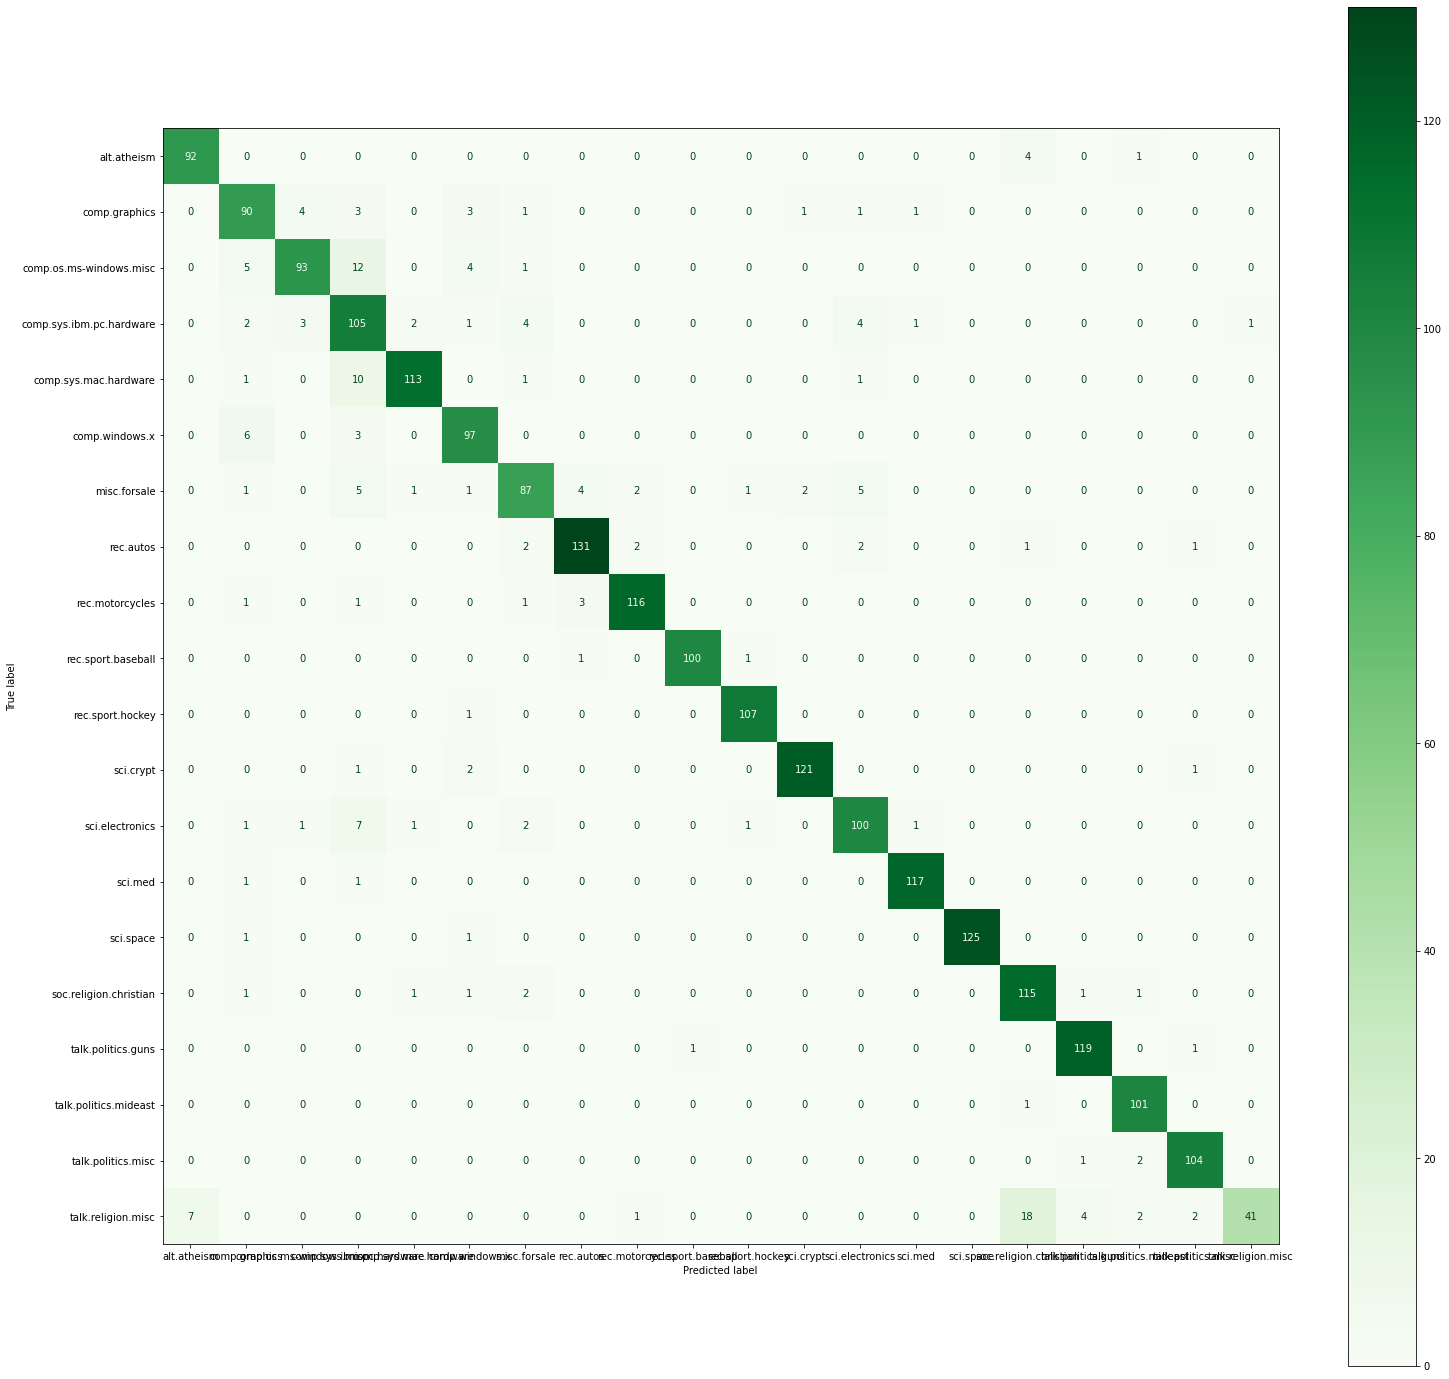

In [21]:
# 3. Plot the confusion matrix of our predictions

fig, ax = plt.subplots(figsize=(25, 25))

disp = plot_confusion_matrix(model, X_test, y_test, display_labels=model.classes_,
                             cmap=plt.cm.Greens, ax=ax)


In [22]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.95      0.94        97
           comp.graphics       0.82      0.87      0.84       104
 comp.os.ms-windows.misc       0.92      0.81      0.86       115
comp.sys.ibm.pc.hardware       0.71      0.85      0.77       123
   comp.sys.mac.hardware       0.96      0.90      0.93       126
          comp.windows.x       0.87      0.92      0.89       106
            misc.forsale       0.86      0.80      0.83       109
               rec.autos       0.94      0.94      0.94       139
         rec.motorcycles       0.96      0.95      0.95       122
      rec.sport.baseball       0.99      0.98      0.99       102
        rec.sport.hockey       0.97      0.99      0.98       108
               sci.crypt       0.98      0.97      0.97       125
         sci.electronics       0.88      0.88      0.88       114
                 sci.med       0.97      0.98      0.98       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [23]:
my_sentence = "Gun control is a controversial topic."

# 1. Apply the text pipeline to your sentence
text = pipeline(my_sentence)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([text])
# 3. Use the model to predict your new `X`. 
# 4. Print the prediction
model.predict(X)

array(['talk.politics.guns'], dtype='<U24')

___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [25]:
# 1. Load the 20-newsgroups.csv data into a dataframe.

# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
print(df.shape)
df.head()

df['revised_tweet'] = df['Tweet'].apply(pipeline)


X = df['revised_tweet'].values
y = df['Party'].values

new_vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40)

model = MultinomialNB(alpha=.05)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=model.classes_))

(86460, 3)
              precision    recall  f1-score   support

    Democrat       0.81      0.79      0.80      8349
  Republican       0.81      0.83      0.82      8943

    accuracy                           0.81     17292
   macro avg       0.81      0.81      0.81     17292
weighted avg       0.81      0.81      0.81     17292



In [26]:
print('Democrats f1-score = .80, while the Republicans f1-score = .82')

Democrats f1-score = .80, while Republicans f1-score = .82
